# THE SPARKS FOUNDATION INTERNSHIP PROJECT

# Task # 2 - To Explore Supervised Machine Learning


# Importing libraries and the dataset

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  Reading data from remote link

In [36]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
print(data.shape)

(25, 2)


In [38]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


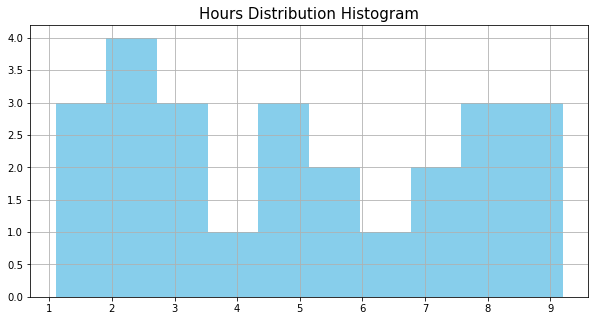

In [39]:
plt.figure(figsize=(10,5))
data['Hours'].hist(color='skyblue')
plt.title('Hours Distribution Histogram',fontsize=15)
plt.show()

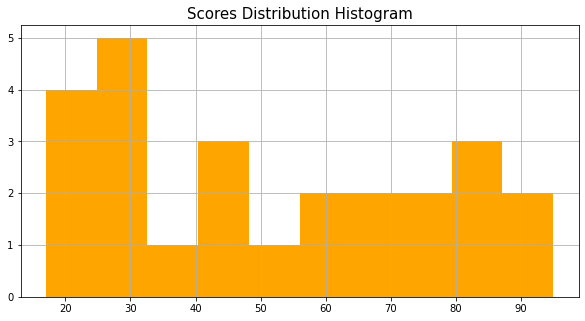

In [40]:
plt.figure(figsize=(10,5))
data['Scores'].hist(color='orange')
plt.title('Scores Distribution Histogram',fontsize=15)
plt.show()

# Plotting Distributions of Scores

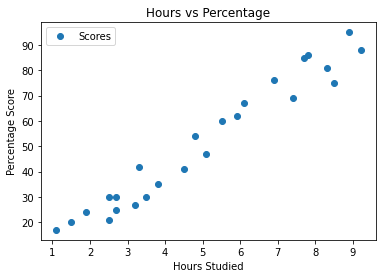

In [41]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the Data

In [42]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [45]:
regressor.coef_

array([9.91065648])

In [46]:
regressor.intercept_

2.018160041434683

# Plotting the regression line

In [47]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

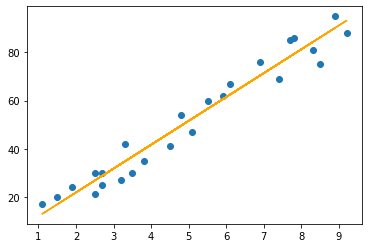

In [48]:
plt.scatter(X, y)
plt.plot(X,line,color='orange');
plt.show()

# Making Predictions

In [49]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


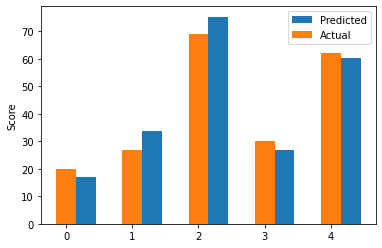

In [51]:
plt.bar(np.arange(5)+0.3,df.Predicted,width=0.3,label='Predicted')
plt.bar(np.arange(5),df.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE: {}'.format(np.sqrt( mean_squared_error(y_test, y_pred))))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("R squared: {}".format(r2_score(y_test, y_pred)))

MSE: 4.6474476121003665
MAE: 4.183859899002975
R squared: 0.9454906892105356


# Predicted Score when student studies for 9.25 hrs in a day

In [53]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the Model

In [71]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
